1. Process of Convolution
    - filter/kernal is a matrix with weights(weight matrix)
    - the weight matrix is a fitler to extract some particular features from the original image. It could be for extracting curves, identifying a specific color or recongnizing a particular voice.
    - the input layer is multiplied with the weighted matrix to give multiple feature/activation maps.
    - this output is given as input to the pooling layer
    - The distance btw two consecutive receptive fields is called stride.
    - The filter can move by 1 pixel to the next receptive field and the process is repeated
    - padding is also done meaning adding zeros to the cells where the values are missing.
    - CNN architecture:
        - Convolution layer
        - Pooling layer
        - Fully Connected layer
    - Convolution layer then followed by reLU layer to convert all negative values to zero.

In [2]:
import tensorflow as tf
import keras
from keras.layers import Dense,Flatten,Activation,Dropout,Conv2D,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist=keras.datasets.mnist

In [3]:
(train_x,train_y),(test_x,test_y)=mnist.load_data()
train_x,test_x=train_x/255.0,test_x/255.0
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#### adding convolution and pooling layers

In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#### adding fully connected layer

In [5]:
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#### Reshape to format which CNN expects (batch,height,width,channels)

In [11]:
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1).astype('float32')
test_x=test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1).astype('float32')

In [12]:
train_x.shape

(60000, 28, 28, 1)

In [13]:
model.fit(train_x,train_y,epochs=1)
model.evaluate(test_x,test_y)

Epoch 1/1
10000/10000 [==============================] - 5s 455us/step


[0.07239230381827802, 0.9773]

#### Interference

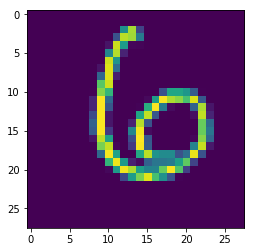

In [23]:
test_image=test_x[100].reshape(28,28)
plt.imshow(test_image)
plt.show()

In [24]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)

In [17]:
result

array([[9.9988079e-01, 4.4031998e-07, 1.0994723e-04, 2.0385477e-07,
        1.8864561e-07, 6.1006574e-07, 7.0184797e-07, 3.5301284e-06,
        8.3146091e-08, 3.3642823e-06]], dtype=float32)

In [18]:
np.around(result)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
np.argmax(result)

6

## Classification Demo Including training on Cats and Dogs

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Activation
from PIL import Image

Using TensorFlow backend.


#### Initialising the CNN

In [3]:
model=Sequential()

#### Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)

In [4]:
model.add(Convolution2D(64,3,3,input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(64,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(64,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(output_dim=128,activation='relu'))
model.add(Dense(output_dim=1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  if sys.path[0] == '':
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launche

In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

#### data importing and transforming and scaling

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#### Scaling test data

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

#### Importing training data

In [8]:
train_set=train_datagen.flow_from_directory('imageclassification\\cat and dog pics\\training_set',
                                            target_size=(64, 64),
                                            batch_size=6,
                                            class_mode='binary')

Found 98 images belonging to 2 classes.


#### which is cat which is dog?

In [9]:
label_map = (train_set.class_indices)
print(label_map)

{'cats': 0, 'dogs': 1}


#### Importng test data

In [10]:
test_set = test_datagen.flow_from_directory('imageclassification\\cat and dog pics\\test_set',
                                            target_size=(64, 64),
                                            batch_size=6,
                                            class_mode='binary')

Found 38 images belonging to 2 classes.


#### fitting model to images

In [11]:
model.fit_generator(train_set,
                    steps_per_epoch=98,
                    epochs=2,
                    validation_data=test_set,
                    validation_steps=28)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
98/98 [==============================] - 9s 93ms/step - loss: 0.6988 - acc: 0.4797 - val_loss: 0.6860 - val_acc: 0.5526
Epoch 2/2
98/98 [==============================] - 7s 74ms/step - loss: 0.6349 - acc: 0.6497 - val_loss: 0.7243 - val_acc: 0.6842


#### prediction of single new data

In [12]:
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('imageclassification\\cat and dog pics\\single_prediction\\dog.jpg'
                           ,target_size =(64,64))

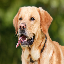

In [13]:
test_image

#### Convert image to array

In [14]:
test_image = image.img_to_array(test_image)

#### For single prediction change the dimension using axis. To remove problem of batch


In [15]:
test_image = np.expand_dims(test_image,axis = 0)

In [16]:
result = model.predict(test_image)

#### Class of dog and cat

In [17]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [18]:
prediction

'dog'

## Using the same priciple on the helmet dataset

In [22]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Activation

In [23]:
model=Sequential()

model.add(Convolution2D(64,3,3,input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(64,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(64,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(output_dim=128,activation='relu'))
model.add(Dense(output_dim=1,activation='sigmoid'))

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: U

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [25]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_set=train_datagen.flow_from_directory('imageclassification\\helmet_detection\\training',
                                            target_size=(64, 64),
                                            batch_size=6,
                                            class_mode='binary')

Found 647 images belonging to 2 classes.


In [32]:
test_set=test_datagen.flow_from_directory('imageclassification\\helmet_detection\\testing',
                                            target_size=(64, 64),
                                            batch_size=6,
                                            class_mode='binary')

Found 208 images belonging to 2 classes.


In [31]:
label_map=train_set.class_indices
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [33]:
model.fit_generator(train_set,
                    steps_per_epoch=1000,
                    epochs=4,
                    validation_data=test_set,
                    validation_steps=30)

Epoch 1/4
1000/1000 [==============================] - 79s 79ms/step - loss: 0.4486 - acc: 0.7881 - val_loss: 0.4022 - val_acc: 0.8500
Epoch 2/4
1000/1000 [==============================] - 74s 74ms/step - loss: 0.2643 - acc: 0.8904 - val_loss: 0.3737 - val_acc: 0.8708
Epoch 3/4
1000/1000 [==============================] - 78s 78ms/step - loss: 0.1458 - acc: 0.9443 - val_loss: 0.1859 - val_acc: 0.9101
Epoch 4/4
1000/1000 [==============================] - 71s 71ms/step - loss: 0.0959 - acc: 0.9655 - val_loss: 0.1498 - val_acc: 0.9607


In [45]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('imageclassification\\helmet_detection\\single_prediction\\333.jpg'
                           ,target_size =(64,64))

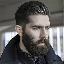

In [46]:
test_image

In [47]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis = 0)
result=model.predict(test_image)

In [48]:
if result[0][0] == 1:
    prediction = 'without helmet'
else:
    prediction = 'with helmet'

In [49]:
prediction

'without helmet'

## using json models

In [ ]:
model_json.model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')
print('saved model to disk')

In [ ]:
# to restore it,
from keras.models import model_from_json

json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
#load weights into the model
loaded_model.load_weights('model.h5')
print('loaded model from disk')